In [2]:
import json
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import math
import us 

from urllib.request import urlopen

In [38]:
df_states = pd.read_csv("../data/cleaned_data/dataset_2.csv", index_col=0)
states_keys = pd.read_csv("../data/cleaned_data/dataset_2_states.csv", index_col=0)
df_states_grouped_sum = df_states.groupby(["date", "state"]).agg("sum")
df_states_grouped_mean = df_states.groupby(["date", "state"]).agg("mean")
grouped_data = df_states_grouped_sum[["cases", "deaths"]].join(df_states_grouped_mean.iloc[:, 3:-1])
grouped_data.head()

cases  deaths  retail_and_recreation_percent_change_from_baseline  \
date state                                                                      
0    0        0.0     0.0                                           5.645409    
     1        1.0     0.0                                           5.214286    
     2        0.0     0.0                                           2.445598    
     3        8.0     1.0                                           6.433962    
     4        0.0     0.0                                           3.027027    

            grocery_and_pharmacy_percent_change_from_baseline  \
date state                                                      
0    0                                               0.781818   
     1                                               4.285714   
     2                                               1.826087   
     3                                               4.264151   
     4                                               2.918919   

            parks_percent_change_from_baseline  \
date state                                       
0    0                               15.367674   
     1                               18.949494   
     2                                2.947518   
     3                               28.776824   
     4                               -3.586678   

            transit_stations_percent_change_from_baseline  \
date state                                                  
0    0                                           2.406067   
     1                                           9.357143   
     2                                          -1.126808   
     3                                           4.616366   
     4                                          -0.277019   

            workplaces_percent_change_from_baseline  \
date state                                            
0    0                                     0.854230   
     1                                    -1.357143   
     2                                     0.771299   
     3                                    -1.773585   
     4                                     0.999688   

            residential_percent_change_from_baseline  mobility_from_baseline  
date state                                                                    
0    0                                     -0.502105              143.007818  
     1                                     -0.295090              160.828571  
     2                                     -0.125817              131.772826  
     3                                     -0.543928              154.343962  
     4                                     -0.218667              147.994595

In [24]:
def get_delta(df, date, col, step):
    new_date = date + step
    f_data = df.loc[new_date, col]
    delta_col = f_data - df.loc[date, col]
    result = df.loc[date]
    result["delta"] = delta_col
    
    return result

In [60]:
delta = get_delta(grouped_data, 80, "cases", 7)
delta.index = pd.Series(delta.index).apply(lambda x: states_keys.iloc[x, 0])
delta.reset_index(inplace=True)
delta["state"] = delta["state"].apply(lambda x:us.states.lookup(x).abbr)
fig = px.choropleth(locationmode="USA-states", locations=delta['state'], color=delta["delta"],
                    color_continuous_scale="reds",
                    scope="usa")

fig.show()

In [41]:
def get_most_mobile_day(df):
    mobility_data = df["mobility_from_baseline"]["mean"].groupby("date").agg("mean")
    return mobility_data.where(mobility_data == max(mobility_data)).dropna().index.tolist()

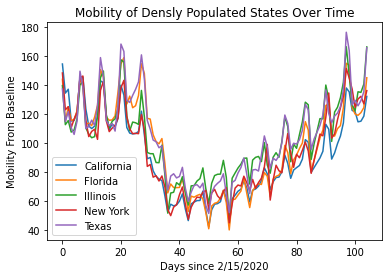

In [101]:
fig = plt.Figure(figsize=(8,6))
for state in [3, 7, 10, 29, 40]:
    state_data = df_states[df_states["state"] == state].groupby("date").agg("mean").reset_index()
    plt.plot(state_data["date"], state_data["mobility_from_baseline"], label=states_keys.iloc[state,0])

plt.xlabel("Days since 2/15/2020")
plt.ylabel("Mobility From Baseline")
plt.title("Mobility of Densly Populated States Over Time")
plt.legend()
plt.savefig('mobility.png', dpi=500)
plt.show()



In [96]:
delta = get_delta(grouped_data, 45, "cases", 7)
delta.index = pd.Series(delta.index).apply(lambda x: states_keys.iloc[x, 0])
delta.reset_index(inplace=True)
delta["state"] = delta["state"].apply(lambda x:us.states.lookup(x).abbr)
fig = px.choropleth(locationmode="USA-states", locations=delta['state'], color=delta["delta"],
                    color_continuous_scale="reds",
                    scope="usa")

fig.show()

In [95]:
delta = get_delta(grouped_data, 97, "cases", 7)
delta.index = pd.Series(delta.index).apply(lambda x: states_keys.iloc[x, 0])
delta.reset_index(inplace=True)
delta["state"] = delta["state"].apply(lambda x:us.states.lookup(x).abbr)
fig = px.choropleth(locationmode="USA-states", locations=delta['state'], color=delta["delta"],
                    color_continuous_scale="reds",
                    scope="usa")

fig.show()